## Аналитика

### Рассчитайте следующие показатели:
#### - Из каких регионов больше всего заявок?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
marketing = pd.read_csv('data_marketing3.csv',delimiter = ';',encoding = 'utf-8',low_memory=False,parse_dates=['Date'],dayfirst=True)
marketing

,Client ID,Domain,City,Region,Browser,Device Category,Date,Pageviews,Campaign,Keyword,...,Bounce Rate,Sessions,Goal Completion Location,Goal Completions,Goal Conversion Rate,Goal Value,Конверсия,Source conv.,Марка,Модель
0,GA1.2.1008664515.1580665610,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-02-02,2.0,(not set),(not set),...,0,1.0,/,0.0,0,0.0,0.0,BMW-keyauto-krd.ru,BMW,Нет данных
1,GA1.2.1018469100.1579095666,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-01-15,2.0,(not set),(not set),...,0,1.0,/,0.0,0,0.0,0.0,BMW-keyauto-krd.ru,BMW,Нет данных
2,GA1.2.1026472417.1566848988,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-06-01,2.0,(not set),(not set),...,0,1.0,/,0.0,0,0.0,0.0,BMW-keyauto-krd.ru,BMW,Нет данных
3,GA1.2.1033768264.1579957500,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-01-25,2.0,(not set),(not set),...,0,1.0,/,0.0,0,0.0,0.0,BMW-keyauto-krd.ru,BMW,Нет данных
4,GA1.2.1034147636.1574186800,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-01-25,2.0,(not set),(not set),...,0,1.0,/,0.0,0,0.0,0.0,BMW-keyauto-krd.ru,BMW,Нет данных
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66529,GA1.2.931145287.1578497465,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-08-01,2.0,(not set),(not set),...,0,1.0,/,1.0,1,9359.0,1.0,BMW-keyauto-krd.ru,BMW,Нет данных
66530,GA1.2.936215499.1579302396,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-01-20,2.0,(not set),(not set),...,0,1.0,/,1.0,1,39827.0,1.0,BMW-keyauto-krd.ru,BMW,Нет данных
66531,GA1.2.943709284.1571860702,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-11-02,2.0,(not set),(not set),...,0,1.0,/,1.0,1,11880.0,1.0,BMW-keyauto-krd.ru,BMW,Нет данных
66532,GA1.2.943948684.1579628291,cars.BMW-keyauto-krd.ru,Krasnodar,Krasnodar Krai,Chrome,mobile,2020-01-21,2.0,(not set),(not set),...,0,1.0,/,1.0,1,20922.0,1.0,BMW-keyauto-krd.ru,BMW,Нет данных


In [4]:
marketing[['Region', 'Конверсия']] 


,Region,Конверсия
0,Krasnodar Krai,0.0
1,Krasnodar Krai,0.0
2,Krasnodar Krai,0.0
3,Krasnodar Krai,0.0
4,Krasnodar Krai,0.0
...,...,...
66529,Krasnodar Krai,1.0
66530,Krasnodar Krai,1.0
66531,Krasnodar Krai,1.0
66532,Krasnodar Krai,1.0


In [5]:
data = marketing.groupby(['Region'])['Конверсия']. sum().reset_index()

In [6]:
top = data.sort_values('Конверсия' , ascending=False)



In [7]:
top.head(5)

,Region,Конверсия
117,Krasnodar Krai,23849.0
223,Stavropol Krai,1642.0
198,Rostov Oblast,1160.0
149,Moscow,1036.0
58,Crimea,667.0


#### - Какой средний процент отказов (Bounce)?

In [8]:
marketing['Bounce Rate'] = marketing['Bounce Rate'].apply(lambda x: float(str(x).split()[0].replace(',','.')))
marketing['Bounce Rate'] = marketing['Bounce Rate'].astype (float)


In [9]:
procent = marketing['Bounce Rate'].mean() * 100
roundplaces = np.round(procent, 
                       decimals = 2)  
print(roundplaces)


0.23


#### - С каких устройств чаще заходят на сайты?


In [10]:
marketing[['Source', 'Конверсия']] 

,Source,Конверсия
0,BMW-keyauto-krd.ru,0.0
1,BMW-keyauto-krd.ru,0.0
2,BMW-keyauto-krd.ru,0.0
3,BMW-keyauto-krd.ru,0.0
4,BMW-keyauto-krd.ru,0.0
...,...,...
66529,BMW-keyauto-krd.ru,1.0
66530,BMW-keyauto-krd.ru,1.0
66531,BMW-keyauto-krd.ru,1.0
66532,BMW-keyauto-krd.ru,1.0


In [11]:
data1 = marketing.groupby(['Source'])['Конверсия']. sum().reset_index()

In [12]:
top1 = data1.sort_values('Конверсия' , ascending=False)

In [13]:
top1.head(10)

,Source,Конверсия
40,google,9106.0
83,yandex.ru,5668.0
78,yandex,5035.0
0,(direct),4790.0
6,BMW-keyauto-krd.ru,4151.0
42,google_go_search,1058.0
12,IG,771.0
29,cars.BMW-keyauto-krd.ru,548.0
39,go.mail.ru,399.0
31,carsdo.ru,367.0


#### - Какие источники наиболее конвертируемые?

Device Category
desktop    28857.0
mobile     47710.0
tablet      2493.0
Name: Sessions, dtype: float64

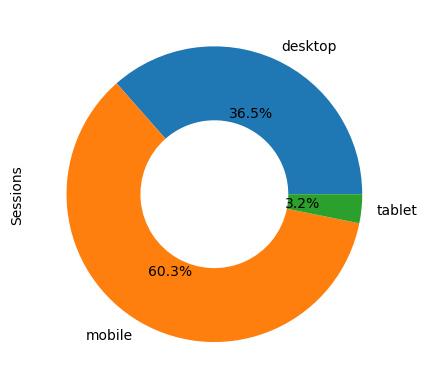

In [14]:
device = marketing.groupby('Device Category').sum(numeric_only=True)['Sessions']

device.plot.pie(y=device, autopct='%1.1f%%', wedgeprops=dict(width=0.5));

device

#### -  Рассчитайте ROMI (при расчете придумайте методологию расчета средней стоимость проданного автомобиля)


In [35]:
spravochnik = pd.read_csv('spravochnik12.csv',delimiter = ',',encoding = 'utf-8',low_memory=False)
spravochnik

,Марка,Модель,Цена,Валюта,Маржинальность,Курс рубля,Маржа в рублях,Цена в рублях
0,Mersedes,gls,"113513,5135",Доллар США,"0,33","94,7081","3547714,2324324478","10750649,189189235"
1,Mersedes,GT_AMG,"174324,3243",Доллар США,"0,34","94,7081","5613374,6837837743","16509925,540540511"
2,BMW,x5,"72222,22222",Евро,"0,27","100,303","1955908,4999999995","7244105,5555555532"
3,BMW,i3,"51666,66667",Евро,"0,35","100,303","1813812,5833333344","5182321,667"
4,Mersedes,с180,2300000,Рубль,"0,2",1,460000,2300000
5,Mersedes,e220,3850000,Рубль,"0,21",1,808500,3850000
6,BMW,x1,2200000,Рубль,"0,22",1,484000,2200000
7,BMW,x3,3350000,Рубль,"0,23",1,770500,3350000
8,Mersedes,c200,2750000,Рубль,"0,24",1,660000,2750000
9,BMW,318,2100000,Рубль,"0,25",1,525000,2100000


In [37]:
crm = pd.read_csv('crm.csv',delimiter = ';',encoding = 'utf-8',low_memory=False)
crm

,Client ID,Город,Просчет стоимости модели,Приход к диллеру,Продажа
0,GA1.2.1823974094.1570697747,Krasnodar,NaN,NaN,NaN
1,GA1.2.702909787.1572668704,Krasnodar,NaN,NaN,NaN
2,GA1.2.730171603.1569937181,Krasnodar,NaN,NaN,NaN
3,GA1.2.730171603.1569937181,Krasnodar,NaN,NaN,NaN
4,GA1.2.730171603.1569937181,Krasnodar,NaN,NaN,NaN
...,...,...,...,...,...
66157,GA1.2.582896947.1578939888,Sochi,0.0,1.0,NaN
66158,GA1.2.1537703151.1579414355,Sochi,0.0,1.0,NaN
66159,GA1.2.1603161394.1581918620,Sochi,0.0,1.0,NaN
66160,GA1.2.594630781.1579251705,Sochi,0.0,1.0,NaN


In [41]:
sell = crm['Продажа'].sum()
sell

4086.0

In [46]:
goal = marketing['Goal Value'].sum()
goal

875703493.0


In [51]:
spravochnik['Маржа в рублях'] = spravochnik['Маржа в рублях'].apply(lambda x: float(str(x).split()[0].replace(',','.')))
spravochnik['Маржа в рублях'] = spravochnik['Маржа в рублях'].astype (float)

In [57]:
margin = spravochnik['Маржа в рублях'].mean()



In [63]:
romi = ((sell * margin)-goal)/goal
romi

6.3131123631762955